In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

rand_st = 42

%matplotlib inline

In [55]:
titanik = pd.read_csv('train.csv', sep=',')

titanik.head(4)
#titanik.columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [56]:
# For EDA you may want to split the original dataframe, and assign X and y later
titanik_train, titanik_validation = train_test_split(titanik, test_size=0.2, random_state= rand_st)

EDA

In [57]:
titanik_train_survived = titanik_train[titanik_train['Survived'] == 1]
titanik_train_survived.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5,C52,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5,NaN,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0,C93,S


In [58]:
s_av = round(titanik_train_survived['Age'].mean(),2)
print(f'The average age of survived passengers was {s_av}.')

The average age of survived passengers was 28.45.


In [59]:
titanik_train_non_survived = titanik_train[titanik_train['Survived'] == 0]                           
s_n_av = round(titanik_train_non_survived['Age'].mean(),2)
print(f'The average age of drowned passengers was {s_n_av}.')

The average age of drowned passengers was 30.21.


In [60]:
aver_age  = titanik_train['Age'].mean()
titanik_train['Age'].replace(to_replace = np.nan, value = aver_age)

331    45.500000
733    23.000000
382    32.000000
704    26.000000
813     6.000000
         ...    
106    21.000000
270    29.498846
860    41.000000
435    14.000000
102    21.000000
Name: Age, Length: 712, dtype: float64

<Figure size 720x360 with 0 Axes>

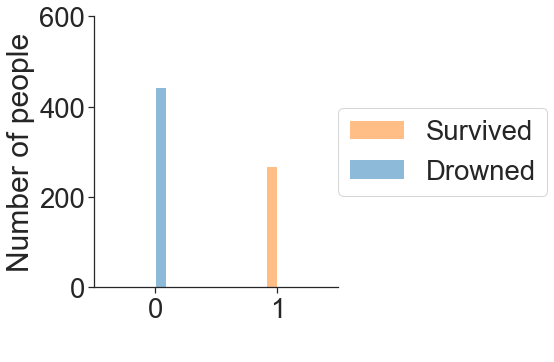

In [61]:
plt.figure(figsize=(10,5))
ax = sns.displot(titanik_train,x="Survived",hue ='Survived',legend = False)

ax.set(xlabel=' ', ylabel='Number of people')
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2.5 )

ax.set(xlim=(-0.5, 1.5), ylim=(0, 600), alpha = 1, frame_on = True)
plt.legend(['Survived','Drowned'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

In [62]:
survived_train_1st_class = titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]/titanik_train[titanik_train['Pclass'] == 1].shape[0]
Class_1 = titanik_train[titanik_train['Pclass'] == 1].shape[0]
surv_1_class = titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]
print(f'The amount of passengers in first class are {Class_1} and from them survived (Survived = 0) the {round(survived_train_1st_class,2)} people.')

The amount of passengers in first class are 163 and from them survived (Survived = 0) the 0.61 people.


In [63]:
titanik_train[titanik_train['Pclass'] == 1].shape[0]
titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]

99

In [64]:
dfg = titanik_train.groupby(['Sex','Pclass'])['Embarked'].count()
dfg

Sex     Pclass
female  1          68
        2          60
        3         115
male    1          93
        2          91
        3         283
Name: Embarked, dtype: int64

[Text(0.5, 0, 'Population')]

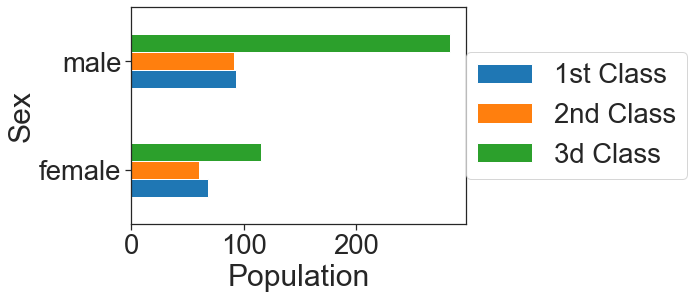

In [65]:
ax = titanik_train.groupby(['Sex','Pclass'])['Embarked'].count().unstack(1).plot.barh()
plt.legend(['1st Class','2nd Class','3d Class'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)
ax.set(xlabel='Population')

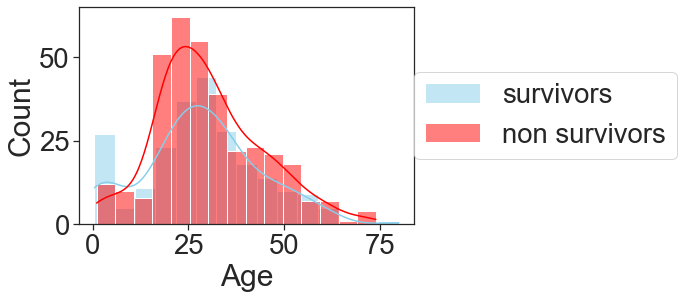

In [66]:
sns.histplot(data=titanik_train_survived, x="Age", color="skyblue", label="survivors", kde=True)
sns.histplot(data=titanik_train_non_survived, x="Age", color="red", label="non survivors", kde=True)

plt.legend() 
ax.set(xlabel='Age', ylabel='People')
plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)
plt.show()

In [67]:
Table_train = titanik_train.groupby(['Survived','Sex','Pclass'])['Survived'].count()
titanik_train1= pd.DataFrame(Table_train, index=pd.Index(['Population'],name = 'Pop'),
                  columns=pd.MultiIndex.from_product([['Yes', 'No'],['Female', 'Male'],['1','2','3']], names=['Survived:', 'Sex:', 'P_class']))
titanik_train1.style

In [68]:
del titanik_train['Ticket']
del titanik_train['Name']
del titanik_train['PassengerId']
del titanik_train['Embarked']

In [69]:
titanik_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
331,0,1,male,45.5,0,0,28.5000,C124
733,0,2,male,23.0,0,0,13.0000,NaN
382,0,3,male,32.0,0,0,7.9250,NaN
704,0,3,male,26.0,1,0,7.8542,NaN
813,0,3,female,6.0,4,2,31.2750,NaN


In [70]:
 # I also checked extra features like Class and Age but it did not give better result in the end so i reduced the features.

X_train = titanik_train.iloc[:,1:]
y_train = titanik_train['Survived']
X_validation = titanik_validation.iloc[:,1:]
y_validation = titanik_validation['Survived']
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape


((712, 7), (179, 11), (712,), (179,))

In [71]:
# Treat of data to make possible the use in the model
# Change the string values Male Female into binary integer
# # convert gender to a Boolean

# my way but here I do not ommit noe of the new transformed features
#titanik_train.loc[titanik_train['Sex'] == 'female', 'Sex'] = 1
#titanik_train.loc[titanik_train['Sex'] == 'male', 'Sex'] = 0
#the Spiced way
X_train['female'] = X_train['Sex'].replace({'male': 0.0, 'female': 1.0})
del X_train['Sex']
X_train.head(5)

,Pclass,Age,SibSp,Parch,Fare,Cabin,female
331,1,45.5,0,0,28.5000,C124,0.0
733,2,23.0,0,0,13.0000,NaN,0.0
382,3,32.0,0,0,7.9250,NaN,0.0
704,3,26.0,1,0,7.8542,NaN,0.0
813,3,6.0,4,2,31.2750,NaN,1.0


In [72]:
titanik_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Cabin       553
dtype: int64

### Fill NaN values for numerical columns

In [73]:

# fill the NaN in the Age column with the mean value of Age

####### First way

X_train['Age'].fillna(value=X_train['Age'].mean(), inplace=True)
X_train.shape
####### Second way

# impute missing values
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer.fit(titanik_train[['Age']])            # learn the most frequent value
#t = imputer.transform(titanik_train[['Age']])  # result is a numpy array
#
## format output as a DataFame
#cols_imputed = pd.DataFrame(t, columns=titanik_train[['Age']].columns)
#titanik_train[['Age']] = cols_imputed

(712, 7)

In [74]:
#X_train.isnull().sum()

In [75]:
# Find the first Letter from the Cabin of Passenger column to make different clssasification
X_train['Cabin'] = X_train['Cabin'].astype(str).str[0]
X_train['Cabin'].unique()


array(['C', 'n', 'B', 'F', 'D', 'E', 'A', 'G', 'T'], dtype=object)

In [76]:
#X_train.shape
#X_train.isnull().sum()

In [77]:
# Make the column with the classes binary 
# Creating "feature matrix"
cols = X_train[['Cabin']]
cols.head()
# cols.shape
# transform a categorical column
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiating the model
ohc.fit(cols)            # learn the classes
t = ohc.transform(cols)  # result is a numpy array
t[:5]
# t.shape

# format output as a DataFame
OHE_cabin = pd.DataFrame(t, columns=ohc.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_cabin.tail()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [78]:
#OHE_cabin.shape
#OHE_cabin.isnull().sum()


In [79]:
# Make the column with the classes binary 
# Creating "feature matrix"
cols = X_train[['Pclass']]
cols.head()
# cols.shape
# transform a categorical column
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiating the model
ohc.fit(cols)            # learn the classes
t = ohc.transform(cols)  # result is a numpy array
t[:5]
# t.shape

# format output as a DataFame
OHE_class = pd.DataFrame(t, columns=ohc.get_feature_names()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_class.tail()
OHE_class.rename({'x0_1': 'Class_1','x0_2': 'Class_2','x0_3': 'Class_3'}, axis='columns',inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [80]:
OHE_class.columns

Index(['Class_1', 'Class_2', 'Class_3'], dtype='object')

In [81]:
# Make the column with the classes binary 
# Creating "feature matrix"
cols = X_train[['SibSp']]
cols.head()
# cols.shape
# transform a categorical column
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiating the model
ohc.fit(cols)            # learn the classes
t = ohc.transform(cols)  # result is a numpy array
t[:5]
# t.shape

# format output as a DataFame
OHE_sib = pd.DataFrame(t, columns=ohc.get_feature_names()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_sib.tail()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_8
707,1.0,0.0,0.0,0.0,0.0,0.0,0.0
708,1.0,0.0,0.0,0.0,0.0,0.0,0.0
709,0.0,0.0,1.0,0.0,0.0,0.0,0.0
710,0.0,1.0,0.0,0.0,0.0,0.0,0.0
711,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#OHE_cabin.shape
#OHE_class.isnull().sum()

In [83]:
# 1. Bin the AGE list !
k = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='quantile')

# 2. fit with the training data (some columns of it)
k.fit(X_train[['Age']])

# 3. transform the training data
bins = k.transform(X_train[['Age']])
bins = pd.DataFrame(bins.todense())  # materializes a sparse matrix so that we can see it
# ALWAYS DO THIS UNLESS YOUR DATA SET IS REALLY BIG

In [84]:
#bins.shape
#bins.isnull().sum()

In [85]:

#fare_scaled.head()
cols = X_train[['Fare']]
cols.head()
# cols.shape

#%% transform a numerical column
scaler = MinMaxScaler()
scaler.fit(cols)               # learn the min and max of the data
t = scaler.transform(cols)     # apply the transformation to the data
t[:5]
# t.shape

#%% format output as a DataFame
fare_scaled = pd.DataFrame(t, columns=cols.columns)
fare_scaled.head()


,Fare
0,0.055628
1,0.025374
2,0.015469
3,0.015330
4,0.061045


In [86]:
#fare_scaled.head()
cols = X_train[['Parch']]
cols.head()
# cols.shape

#%% transform a numerical column
scaler = MinMaxScaler()
scaler.fit(cols)               # learn the min and max of the data
t = scaler.transform(cols)     # apply the transformation to the data
t[:5]
# t.shape

#%% format output as a DataFame
parch_scaled = pd.DataFrame(t, columns=cols.columns)
parch_scaled.head()


,Parch
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.333333


In [87]:
#fare_scaled.head()
cols = X_train[['Age']]
cols.head()
# cols.shape

#%% transform a numerical column
scaler = MinMaxScaler()
scaler.fit(cols)               # learn the min and max of the data
t = scaler.transform(cols)     # apply the transformation to the data
t[:5]
# t.shape

#%% format output as a DataFame
age_scaled = pd.DataFrame(t, columns=cols.columns)
age_scaled.head()

,Age
0,0.566474
1,0.283740
2,0.396833
3,0.321438
4,0.070118


In [88]:
#titanik_train.reset_index(inplace=True)
unmodified = X_train[['female']]

In [89]:
# Change the binning of the problematic unmodified indexes
unmodified.index = OHE_class.index

In [90]:
X_train = pd.concat([ OHE_class,OHE_sib, fare_scaled,parch_scaled,age_scaled,unmodified], axis=1) # I exclude the Frame OHE_Cabin
X_train

,Class_1,Class_2,Class_3,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_8,Fare,Parch,Age,female
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055628,0.000000,0.566474,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025374,0.000000,0.283740,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015469,0.000000,0.396833,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.015330,0.000000,0.321438,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.061045,0.333333,0.070118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014932,0.000000,0.258608,1.0
708,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060508,0.000000,0.365404,0.0
709,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.027538,0.000000,0.509927,0.0
710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.234224,0.333333,0.170646,1.0


In [96]:
# Add misssing features and rearrange the Columns
X_train['x0_6'] = 0.0
X_train['x0_7'] = 0.0
X_train
X_train = X_train[['Class_1','Class_2','Class_3', 'x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7','x0_8', 'Fare', 'Parch','Age','female']]
X_train

,Class_1,Class_2,Class_3,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,Fare,Parch,Age,female
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055628,0.000000,0.566474,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025374,0.000000,0.283740,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015469,0.000000,0.396833,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015330,0.000000,0.321438,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.061045,0.333333,0.070118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014932,0.000000,0.258608,1.0
708,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060508,0.000000,0.365404,0.0
709,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027538,0.000000,0.509927,0.0
710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234224,0.333333,0.170646,1.0


## Fit the model

In [97]:
m = LogisticRegression()    # create the model
m.fit(X_train, y_train)                 # train the model -> find best coefficients

m.coef_

array([[ 0.79875598,  0.14320429, -0.94200994,  0.69820643,  0.81772366,
         0.61620362, -0.65210769, -0.14612361, -0.52910261,  0.        ,
         0.        , -0.80484946,  0.83579898, -0.56288767, -1.69623533,
         2.5568552 ]])

In [38]:
# calculate the accuracy
m.score(X_train, y_train)

0.8057784911717496

# Before I try to predict I got to do the feauture enineering tor the valide data

In [98]:
del titanik_validation['Ticket']
del titanik_validation['Name']
del titanik_validation['PassengerId']
del titanik_validation['Embarked']

In [40]:
X_validation['female'] = X_validation['Sex'].replace({'male': 0.0, 'female': 1.0})
del X_validation['Sex']

X_validation['Age'].fillna(value=X_validation['Age'].mean(), inplace=True)
#################


X_validation['Cabin'] = X_validation['Cabin'].astype(str).str[0]
X_validation['Cabin'].unique()
cols_validation = X_validation[['Cabin']]
t_validation = ohc.transform(cols_validation)  # result is a numpy array
OHE_cabin = pd.DataFrame(t_validation, columns=ohc.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3


###################

cols_validation = X_validation[['SibSp']]
t_validation = ohc.transform(cols_validation)  # result is a numpy array
OHE_sib = pd.DataFrame(t_validation, columns=ohc.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3



###################

cols_validation = X_validation[['Pclass']]
# cols.shape
# transform a categorical column
t_validation = ohc.transform(cols_validation)  # result is a numpy array
OHE_class = pd.DataFrame(t_validation, columns=ohc.get_feature_names()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_class.rename({'x0_1': 'Class_1','x0_2': 'Class_2','x0_3': 'Class_3'}, axis='columns',inplace=True)


###################
bins = k.transform(X_validation[['Age']])
bins = pd.DataFrame(bins.todense())  # materializes a sparse matrix so that we can see it
# ALWAYS DO THIS UNLESS YOUR DATA SET IS REALLY BIG


###################
cols = X_validation[['Fare']]
t = scaler.transform(cols)     # apply the transformation to the data
fare_scaled = pd.DataFrame(t, columns=cols.columns)

###################
cols = X_validation[['Parch']]
t = scaler.transform(cols)     # apply the transformation to the data
parch_scaled = pd.DataFrame(t, columns=cols.columns)
###################

###################
cols = X_validation[['Age']]
t = scaler.transform(cols)     # apply the transformation to the data
age_scaled = pd.DataFrame(t, columns=cols.columns)
###################

unmodified = X_validation[['female']]
unmodified.index = OHE_class.index
X_validation = pd.concat([ OHE_class,OHE_sib,fare_scaled,parch_scaled,age_scaled ,unmodified], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cabin
Feature names seen at fit time, yet now missing:
- SibSp

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Pclass
Feature names seen at fit time, yet now missing:
- SibSp

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklea

In [41]:
X_validation.head(3)

,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_8,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Fare,Parch,Age,female
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.186301,0.007288,0.380834,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126665,-0.005278,0.384267,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094308,-0.005278,0.246042,0.0


In [ ]:
m.score(X_validation, y_validation)

## 4. Test for Overfitting and Underfitting

In [ ]:
ypred = m.predict(X_validation)   # prediction for the same data points

In [ ]:
ypred = m.predict(X_validation) 
accuracy_score(y_validation,ypred) 

no overfitting here since train and test are very close

no underfitting here since the accuracy score is pretty high

# Confusion Matrix

In [ ]:
conf = confusion_matrix(y_validation,ypred)
conf
#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'Oranges')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


Seems a balanced result

In [ ]:
conf[1][1]

In [ ]:
acc = (conf[0][0] + conf[1][1])/(conf[0][0] + conf[1][1] + conf[0][1] + conf[1][0])
acc

## 7. Receiver Operator Curve and Area Under the Curve.

In [ ]:
probs = m.predict_proba(X_validation) 
fpr, tpr, threshold = roc_curve(y_validation, probs[:,1])

In [ ]:
# Calculating area under the curve
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

plot_roc_curve(m, X_validation, y_validation)  
plt.title("ROC Curve")

plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.00])

plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

## 8. Precision Recall Curve

In [ ]:
# plot precision and recall curve 
plot_precision_recall_curve(m, X_validation, y_validation)
precisions, recalls, thresholds = precision_recall_curve(y_validation, probs[:,1])

plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

In [ ]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

In [ ]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()